In [1]:
from IPython.core.display import HTML
HTML("<style>.jp-RenderedMarkdown{display:flex;flex-direction:column;font-family:'IRANSans,Tahoma,Helvetica,sans-serif';margin-top:10px;font-size:1rem;direction:rtl}mark{color: inherit;padding:2px; background-color:#88888888}</style>")

<div>
    <h2>دسته‌بند مناسب </h2>
    <br> 
    ابتدا کتابخانه‌های مورد نیاز را بارگزاری کنید
    </div>

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

<div>
 ابتدا داده‌های مربوطه را بارگذاری می‌کنیم.
    </div>

In [3]:
uci_hand = datasets.load_digits()

<div>
می‌توانید با بررسی کردن داده‌ها بخش‌های مختلف آن را مورد ارزیابی قرار دهید. برای مثال می‌توانید چند عکس آن را نمایش دهید.
    </div>

Number is: 0


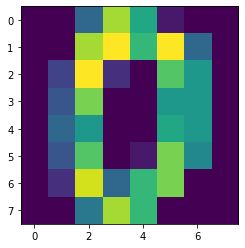

In [4]:
images = uci_hand['images']
X = uci_hand["data"]
y = uci_hand['target']
num_classes = len(np.unique(y))
plt.imshow(images[0])
print('Number is:', y[0])

<div>
    همانطور که در فصول قبل گفته شد یکی از راه‌های موثر در شناخت نحوه توزیع ویژگی‌ها در بحث انتخاب ویژگی
     (feature selection) یا استخراج ویژگی‌ها
    (feature extraction)،
     استفاده از روش‌های تصویرسازی است. باتوجه به بالا بودن ابعاد ویژگی‌های داده‌های تصویری نمایش توزیع ویژگی‌ها به سادگی امکانپذیر نمی‌باشد. رایج ترین روش موجود برای حل این مشکل استفاده از روش‌های کاهش بعد می‌باشد.
    <br>
    اکنون برای نمونه سعی می‌کنیم به روش PCA 
    مجموعه داده‌های این تمرین را مورد بررسی قرار دهیم
</div>

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X)


<div>
    اکنون میتوان بررسی کرد عملکرد PCA
    در مورد این مجموعه داده چگونه بوده است بدین منظور با استفاده از دستور زیر بررسی میکنیم مجموعه داده کاهش یافته چه میزان از اطلاعات مجموعه ابتدایی را با خود به همراه دارد یا به عبارت دیگر هر کدام از عناصر جدید چه میزان از مجموعه اولی را تفسیر می‌کنند
<br>
    همانطور که مشاهده می‌شود این مجموعه ۴۸ درصد از داده مجموعه اول را به همراه دارد
</div>

In [6]:
print(pca.explained_variance_ratio_)
np.sum(pca.explained_variance_ratio_)

[0.14890594 0.13618771 0.11794594 0.08409979]


0.48713938007906826

<div>
    اکنون سعی با استفاده از تابع draw_scatter
     که در ادامه تعریف کردیم این خروجی را نمایش می‌دهیم
    </div>

In [7]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patheffects as PathEffects

def draw_scatter(x, y):


    palette = np.array(sns.color_palette("hls", num_classes))
    
    
    f = plt.figure(figsize=(16,16))
    #3d scatter plot that contains 40% of our first dataset
    ax3d = f.add_subplot(211,projection='3d')
    #2d scatter plot can be easily seen and contains about 30% of our first dataset
    ax2d = f.add_subplot(212,aspect='equal')
    ax3d.scatter(x[0], x[1],x[2], lw=0, s=40, c=palette[y.astype(np.int)])
    sc = ax2d.scatter(x[0], x[1], lw=0, s=40, c=palette[y.astype(np.int)])
    

    # add the labels for each digit corresponding to the label

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext,ztext = [np.median(x[j][y == i]) for j in range(3)]
        
        text = ax2d.text(xtext, ytext, str(i), fontsize=24)
        text.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        text2 = ax3d.text(xtext, ytext,ztext, str(i), fontsize=24)
        text2.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        


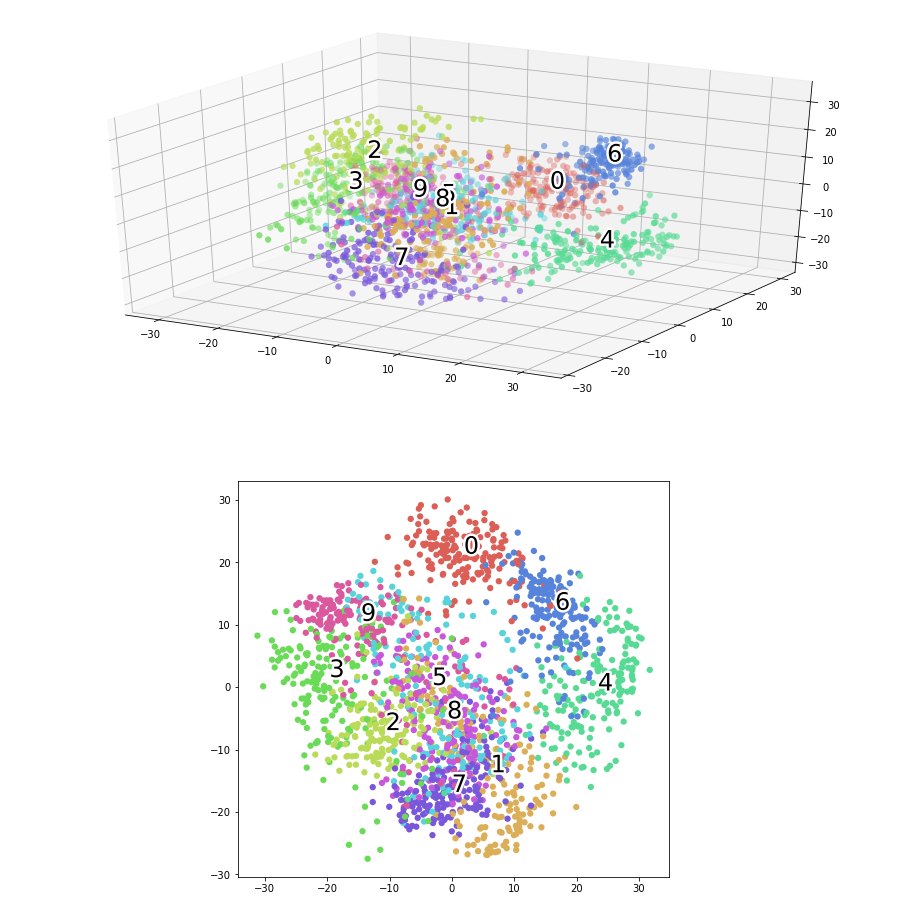

In [8]:
y_pca = uci_hand['target']
X_pca = np.array((pca_result[:,0],pca_result[:,1],pca_result[:,2]))
draw_scatter(X_pca,y_pca)

<div>
    اکنون همان کاری که در مرحله قبل با استفاده از PCA
    انجام دادیم، با استفاده از tsne
    انجام می‌دهیم.
    <br>
    همانطور که آموختید این الگوریتم در واقع کاری مشابه با PCA 
    انجام می‌دهد اما با یک دید آماری. این الگوریتم که بسیار جدیدتر می‌باشد، معمولا دقت بهتری دارد ولی زمان انجام فرآیند محاسباتی‌اش طولانی تر خواهد داشت
    </div>

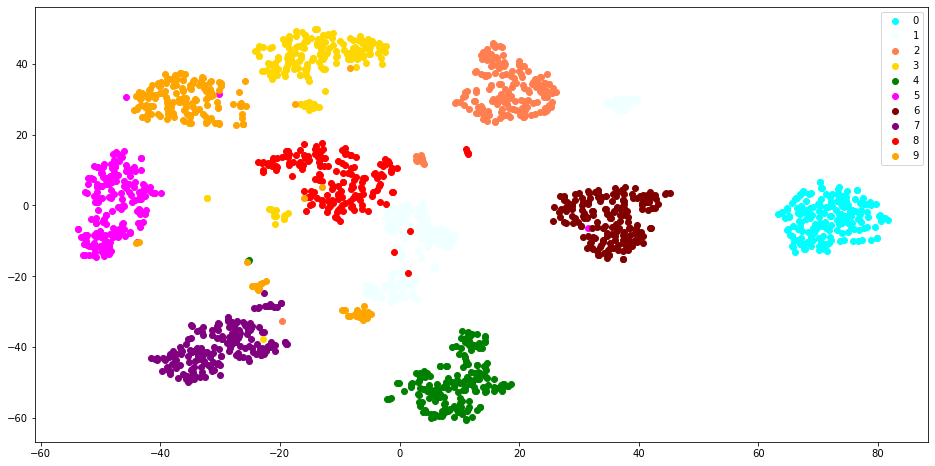

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
 
X_2d = tsne.fit_transform(X)
 
plt.figure(figsize=(16, 8))
colors = 'aqua', 'azure', 'coral', 'gold', 'green', 'fuchsia', 'maroon', 'purple', 'red', 'orange'
for i, c, label in zip(range(num_classes), colors, uci_hand.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

<div>
     در ادامه قصد داریم از بین مدل‌های دسته بندی که تا کنون آموختیم بهترین مدل را برای این مسئله انتخاب کنیم. برای تست و یافتن مدل بهتر از روش  
    KFold 
     استفاده کنید.
    <br>
    شما باید تابع 
    kfold_accuracies
    را به گونه‌ای تکمیل کنید که ابتدا داده‌ها را به ۵ دسته تقسیم می‌کند و سپس به ازای هر کدام مدل انتخابی را روی داده‌های آموزش 
    fit می‌کند و پارامتر 
    accuracy را محاسبه می‌کند و در یک ماتریس اضافه می‌کند و در نهایت ماتریس 
 را بر می‌گرداند
    </div>

In [16]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score

def kfold_accuracies(model,X,y):

    return cross_val_score(model, X, y, cv=5)

    

<div>
    با استفاده از سلول زیر تست  ساده کنید که آیا تابع kfold_accuracies 
    که نوشتید به طور کلی عملکرد صحیحی دارد 
    </div>

In [17]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier

iris = load_iris()
accs = kfold_accuracies(DummyClassifier(),iris['data'],iris["target"])
assert float(accs[0])

<div>
در این مرحله شما می‌بایست با کمک تابعی که در مرحله قبل پیاده‌سازی کردید دسته‌بند مورد نظر خود برای این کار را انتخاب کنید.
    پس از انتخاب نهایی دسته‌بند‌ مناسب در تابع 
    <mark>create_classifier</mark>
    یک نمونه از آن ساخته و برگردانید
    </div>

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
print(kfold_accuracies(LogisticRegression(),X_2d,y))
print(kfold_accuracies(RandomForestClassifier(),X_2d,y))
print(kfold_accuracies(KNeighborsClassifier(),X_2d,y))

def create_classifier():
    return KNeighborsClassifier()

c:\users\mahta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mahta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\mahta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mahta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warn

[0.88186813 0.9281768  0.86072423 0.95798319 0.88450704]
[0.97252747 0.90883978 0.97493036 0.98879552 0.95492958]


c:\users\mahta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\mahta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\mahta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\mahta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

[0.96703297 0.96961326 0.98328691 0.98879552 0.95774648]


<div>
     همانطور که در انتهای فصل دسته بندی گفته شد معیار‌های دیگری نیز برای بررسی صحت مدل وجود دارد که در بعضی مواقع این معیار‌ها از دقت 
    (accuracy)
    اهمیت بیشتری پیدا می‌کند.
    <br>
    با اجرای سلول زیر معیار دیگری از صحت مدل خود را می‌توانید مشاهده کنید
    </div>

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=45)

model = create_classifier()
model.fit(x_train,y_train)

predict = model.predict(x_test)
print("Evaluation")
print(classification_report(y_test, predict))

print ("Confusion matrix")
print(confusion_matrix(y_test, predict))

Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.96      1.00      0.98        46
           2       1.00      1.00      1.00        51
           3       0.97      1.00      0.98        63
           4       1.00      0.95      0.97        59
           5       1.00      0.98      0.99        46
           6       0.98      1.00      0.99        55
           7       0.92      1.00      0.96        58
           8       0.96      0.94      0.95        52
           9       0.98      0.90      0.94        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

Confusion matrix
[[51  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  0  0  0]
 [ 0  0  0 63  0  0  0  0  0  0]
 [ 0  1  0  0 56  0  0  2  0  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  0  0  0  

<div>
در این تمرین از شما انتظار می‌رود تا به  میانگین دقت 
    <mark>96</mark>
    درصد و بالاتر از آن برسید.
    </div

In [27]:
assert np.mean(kfold_accuracies(create_classifier(),X,y))>0.96

<div>
    پس از ذخیره کردن نوت‌بوک و قرار دادن دو تابع 
    <mark>kfold_accuracies</mark>
    و
    <mark>create_classifier</mark>
    در 
    <mark>functions.py</mark>
    ارسال پاسخ را انتخاب کنید.
    </div>